# Classifying Color Images - Dogs, Cats
### Author: Samuel Adamson
### Tensorflow, Google ML Datasets, Numpy, MatPlotLib
### Last Edited 01/31/2022

In [4]:
# Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

# Set logging for errors only
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# Make directories
!mkdir figs
# !mkdir model

mkdir: cannot create directory ‘figs’: File exists


Download Data from Google ML Dataset <br>
Unzip Data <br>
Store directories with different data types: <br>
&emsp; Training Data <br>
&emsp; Validation Data <br>
<br>
Evaluate data - Number of data points in each category

In [5]:
# Data url for download
DATA_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
# Download, store in directory, extract from .zip
dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=DATA_URL, extract=True)

# Store path to each type of data (training/validation)
data_dir = os.path.join(os.path.dirname(dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'validation')

# Store path to each type of image classification
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')


# Number of validation images
num_val = len(os.listdir(valid_cats_dir)) + len(os.listdir(valid_dogs_dir))
print(f'Number of validation images: {num_val}')

# Number of training images
num_train = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
print(f'Number of training images: {num_train}')
print('---')

# Number of training / validation cats
num_train_cats = len(os.listdir(train_cats_dir))
num_valid_cats = len(os.listdir(valid_cats_dir))
tot_cats = num_train_cats + num_valid_cats
print(f'Number of training cat images: {num_train_cats}')
print(f'Number of validation cat images: {num_valid_cats}')
print(f'Total number of cat images: {tot_cats}')
print('---')

# Number of training / validation dogs
num_train_dogs = len(os.listdir(train_dogs_dir))
num_valid_dogs = len(os.listdir(valid_dogs_dir))
tot_dogs = num_train_dogs + num_valid_dogs
print(f'Number of training dog images: {num_train_dogs}')
print(f'Number of validation dog images: {num_valid_dogs}')
print(f'Total number of dog images: {tot_dogs}')

Number of validation images: 1000
Number of training images: 2000
---
Number of training cat images: 1000
Number of validation cat images: 500
Total number of cat images: 1500
---
Number of training dog images: 1000
Number of validation dog images: 500
Total number of dog images: 1500


Set up data parameters

In [6]:
# Batch Size -- Number of images to process before adjusting model weights
BATCH_SIZE = 100
# Image Size -- height and width
IMG_SIZE = 150                            

Visualize Data

In [7]:
# Plot images and labels
# @PARAMS: Training data batch - images, labels
# @RETURN: None
def plotData(images, labels, filename):
    # Set figure size
    plt.figure(figsize=(20,20))

    # Iterate through images
    for i, img in enumerate(images):
        # Plot Image
        plt.subplot(5,5,i+1)
        # Hide ticks
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        # Image and corresponding label
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel(labels[i])

    # Show pot
    plt.show()
    # plt.savefig(f'./figs/{filename}')

Data augmentation<br>
&emsp; Modify testing images so that the model is unable to memorize unwanted patterns

Found 2000 images belonging to 2 classes.


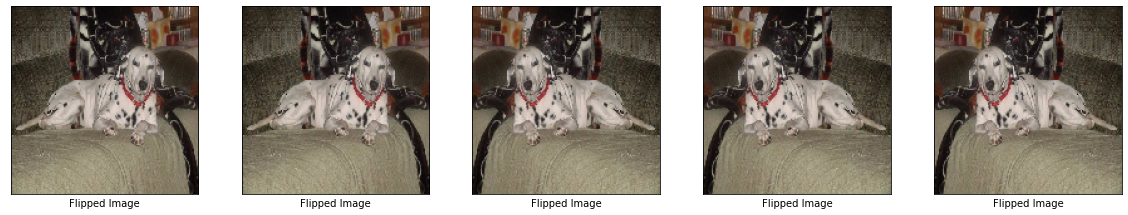

In [8]:
## HORIZONTAL FLIP
# This generator utilizes horizontal flip to augment data
img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# Create flipped images from training directory
train_img_gen = img_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir,
                                               shuffle=True, target_size=(IMG_SIZE, IMG_SIZE))

# Plot the same image flipped 5 times
horizontal_flipped_img = [train_img_gen[0][0][0] for i in range(5)]
horizontal_flipped_lbl = ['Flipped Image'] * 5
plotData(horizontal_flipped_img, horizontal_flipped_lbl, 'flippedImages.png')

Found 2000 images belonging to 2 classes.


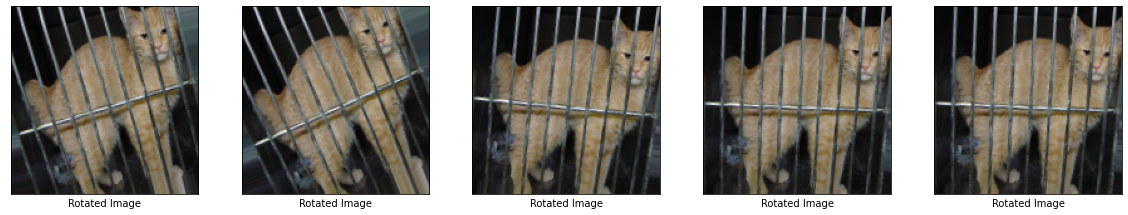

In [9]:
## ROTATION
# This generator utilizes rotation range to augment data
img_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

# Create flipped images from training directory
train_img_gen = img_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir,
                                               shuffle=True, target_size=(IMG_SIZE, IMG_SIZE))

# Plot the same image rotated 5 times
rotated_img = [train_img_gen[0][0][0] for i in range(5)]
rotated_lbl = ['Rotated Image'] * 5
plotData(rotated_img, rotated_lbl, 'rotatedImages.png')

Found 2000 images belonging to 2 classes.


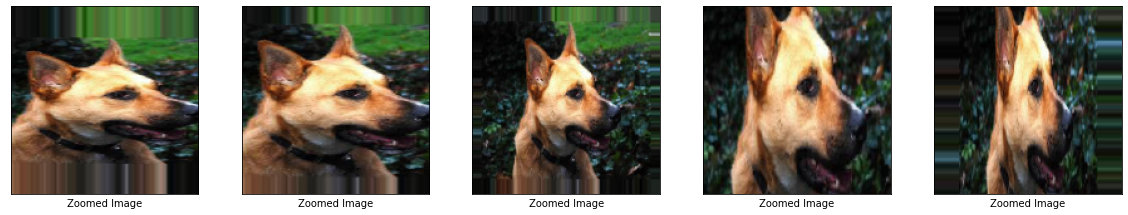

<Figure size 432x288 with 0 Axes>

In [20]:
## ZOOM
# This generator utilizes rotation range to augment data
img_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

# Create flipped images from training directory
train_img_gen = img_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir,
                                               shuffle=True, target_size=(IMG_SIZE, IMG_SIZE))

# Plot the same image rotated 5 times
zoomed_img = [train_img_gen[0][0][0] for i in range(5)]
zoomed_lbl = ['Zoomed Image'] * 5
plotData(zoomed_img, zoomed_lbl, 'zoomedImages.png')

Found 2000 images belonging to 2 classes.


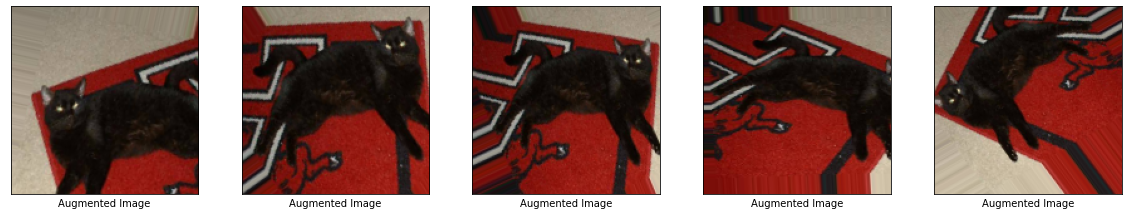

Found 1000 images belonging to 2 classes.


In [10]:
## PUT ALL AUGMENTATIONS TOGEtHER
img_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment training data
train_img_gen = img_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir,
                                            shuffle=True, target_size=(IMG_SIZE, IMG_SIZE), class_mode='binary')

# Plot same 5 augmented image
# Plot the same image rotated 5 times
aug_img = [train_img_gen[0][0][0] for i in range(5)]
aug_lbl = ['Augmented Image'] * 5
plotData(aug_img, aug_lbl, 'augmentedImages.png')


# Image generator for validation images
img_gen_val = ImageDataGenerator(rescale=1./255)

# Generate images
val_img_gen = img_gen_val.flow_from_directory(batch_size=BATCH_SIZE, directory=valid_dir,
                                              target_size=(IMG_SIZE, IMG_SIZE), class_mode='binary')

Create Model -- 4 Convolution Blocks 1 Densely Connected Layer

In [11]:
# Create Model
model = tf.keras.models.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Block 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Block 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Block 4
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Compile Model
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy']
)

# Display summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Train Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/100
20/20 [==============================] - 29s 963ms/step - loss: 0.7336 - accuracy: 0.5090 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 20s 1s/step - loss: 0.6945 - accuracy: 0.5020 - val_loss: 0.6922 - val_accuracy: 0.5390
Epoch 3/100
20/20 [==============================] - 20s 1s/step - loss: 0.6928 - accuracy: 0.5015 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 19s 972ms/step - loss: 0.6918 - accuracy: 0.5150 - val_loss: 0.6915 - val_accuracy: 0.5540
Epoch 5/100
20/20 [==============================] - 19s 970ms/step - loss: 0.6885 - accuracy: 0.5355 - val_loss: 0.6923 - val_accuracy: 0.5180
Epoch 6/100
20/20 [==============================] - 19s 972ms/step - loss: 0.6858 - accuracy: 0.5315 - val_loss: 0.6783 - val_accuracy: 0.5320
Epoch 7/100
20/20 [==============================] - 19s 960ms/step - loss: 0.6742 - accuracy: 0.5465 - val_loss: 0.6859 - val_accuracy: 0.513

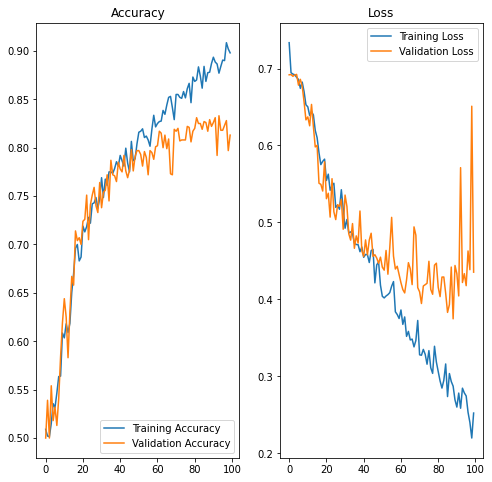

In [12]:
# Number of Epochs
EPOCH_COUNT = 100
# Conduct Training
history = model.fit_generator(
    train_img_gen,
    steps_per_epoch=int(np.ceil(num_train / float(BATCH_SIZE))),
    epochs=EPOCH_COUNT,
    validation_data=val_img_gen,
    validation_steps=int(np.ceil(num_val / float(BATCH_SIZE)))
)

# Store Accuracy
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Store Loss
loss = history.history['loss']
validation_loss = history.history['val_loss']

# Range of epochs
epochs_range = range(EPOCH_COUNT)

# Plot configuration -- Accuracy
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Plot configuration -- Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

# Save figure
plt.savefig('./figs/training.png')
plt.show()

In [13]:
model.save('./model')

!zip -r model.zip ./model
from google.colab import files
files.download("./model.zip")

INFO:tensorflow:Assets written to: ./model/assets
  adding: model/ (stored 0%)
  adding: model/saved_model.pb (deflated 89%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: model/variables/variables.index (deflated 67%)
  adding: model/keras_metadata.pb (deflated 92%)
  adding: model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>